In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\delivery_time.csv")
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
data.skew()
# Approximately normally distributed data

DeliveryTime    0.352390
SortingTime     0.047115
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.isnull().sum()
# No null values 

DeliveryTime    0
SortingTime     0
dtype: int64

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

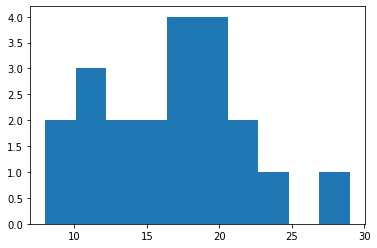

In [7]:
import matplotlib.pyplot as plt
plt.hist(data.DeliveryTime)
# "Delivery time" is approximately normally distributed

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

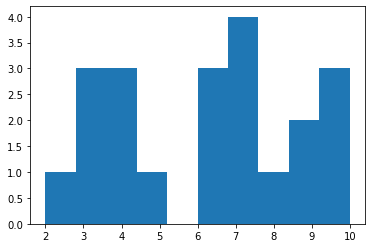

In [8]:
plt.hist(data.SortingTime)
# "Sorting time" is approximately normally distributed

{'whiskers': [<matplotlib.lines.Line2D at 0x3c5083f820>,
 'caps': [<matplotlib.lines.Line2D at 0x3c5083fee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x3c5083f4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x3c508495e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3c508498e0>],
 'means': []}

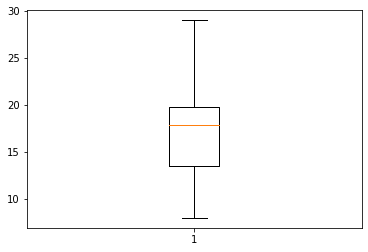

In [9]:
plt.boxplot(data.DeliveryTime,vert=1)
# "Delivery time" contains No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x3c50898880>,
 'caps': [<matplotlib.lines.Line2D at 0x3c50898df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x3c50898520>],
 'medians': [<matplotlib.lines.Line2D at 0x3c508a54f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3c508a57f0>],
 'means': []}

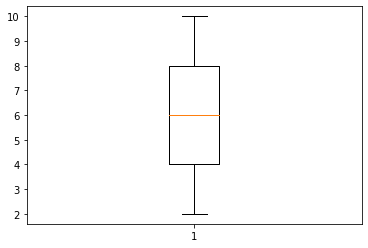

In [10]:
plt.boxplot(data.SortingTime,vert=1)
# "Sorting time" contains No outliers

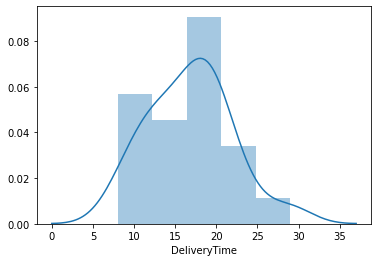

In [11]:
import seaborn as sns
sns.distplot(data.DeliveryTime,label='DeliveryTime')
# "Delivery time" is approximately normally distributed

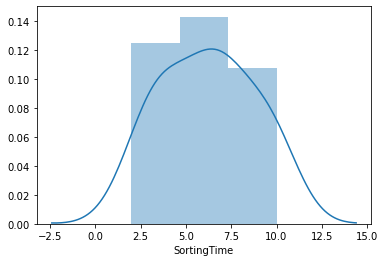

In [12]:
sns.distplot(data.SortingTime,label='SortingTime')
# "Sorting time" is approximately normally distributed

In [13]:
data.corr()
# Strongly Correlated

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


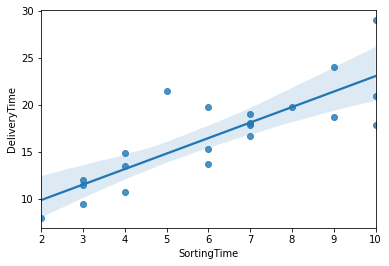

In [14]:
sns.regplot(x="SortingTime",y="DeliveryTime",data=data)

In [15]:
import statsmodels.formula.api as smf
model=smf.ols("DeliveryTime~SortingTime",data=data).fit()
# Building Regression Model

In [16]:
model.params 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        13:53:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

prob(Sorting time)<0.05 thus it is significant variable,P(model)<0.05 thus it is significant model,r squared value =0.682 this shows it is moderate model.

To increase the r squared value we have to use some transformations as follows,

In [17]:
import statsmodels.formula.api as smf
model1=smf.ols("np.log(DeliveryTime)~SortingTime",data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Tue, 19 Jan 2021   Prob (F-statistic):           1.59e-06
Time:                          13:53:40   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By using log function to the delivery time we can improve our r squared value to 0.711

### Test and Train

In [18]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.4)
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2)/data.shape[0])


In [19]:
train_model=smf.ols('np.log(DeliveryTime)~SortingTime',data = train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=np.log(train_data["DeliveryTime"])
errors=predtrain-actualtrain
rmse_train=RMSE(predtrain,actualtrain)
rmse_train

0.035823531286048274

In [20]:
predtest=train_model.predict(test_data)
actualtest=np.log(test_data["DeliveryTime"])
errors=predtest-actualtest
rmse_test=RMSE(predtest,actualtest)
rmse_test

0.03971070842294123